### 3.3 Filtrage

Dans la section précédente, vous avez vu comment afficher le contenu fréquentiel d'un signal. À présent, nous allons voir comment <i>concevoir des filtres</i> qui permettent de <i>modifier</i> ce contenu fréquentiel. En plus des librairies habituelles (`numpy` et `matplotlib.pyplot`), nous utiliserons également pour les exercices suivants :

In [30]:
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy import signal
from scipy.io.wavfile import read, write
import random

**Exercice 3.13** Un filtre de Butterworth d'ordre 1 atténue un signal de 20 dB par décade. Écoutez un signal sinusoïdal de 440 Hz échantillonné à 2000 Hz. Grâce à la fonction `signal.butter`, concevez un filtre de Butterworth d'ordre 1 dont la fréquence de coupure est choisie pour obtenir une atténuation de -20 dB à 440 Hz. Filtrez le signal original grâce à la fonction `signal.filtfilt` et écoutez le signal filtré.

Lecture du signal original...
Lecture du signal filtré...


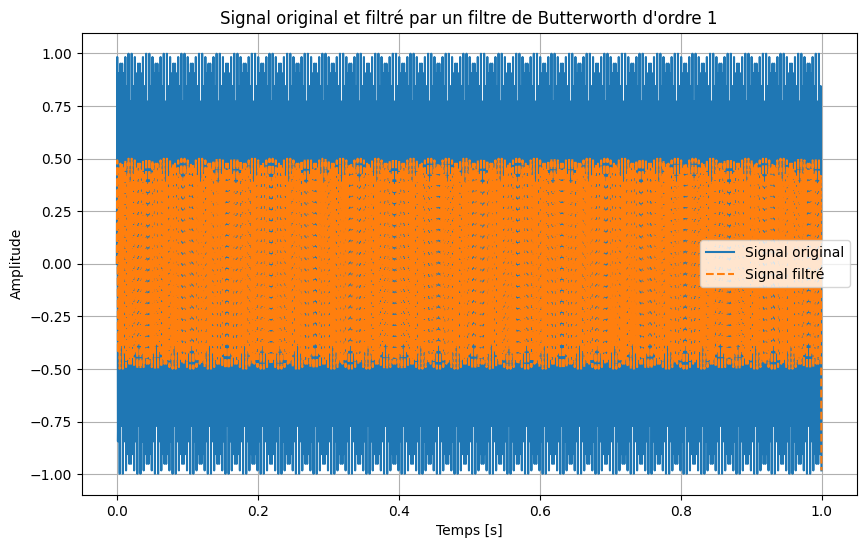

In [11]:
# Paramètres du signal
Fe = 2000  # Fréquence d'échantillonnage (2000 Hz)
Te = 1 / Fe
duree = 1  # Durée du signal (2 secondes)
f_sin = 440  # Fréquence du signal sinusoïdal (440 Hz)

# Génération du signal sinusoïdal
t = np.arange(0, duree, Te)
s = np.sin(2 * np.pi * f_sin * t)

# Écouter le signal original
print("Lecture du signal original...")
sd.play(s, Fe)
sd.wait()

# Conception du filtre de Butterworth d'ordre 1
# Fréquence de coupure choisie pour atténuer à -20 dB à 440 Hz
# On veut une atténuation de -20 dB à la fréquence 440 Hz, ce qui correspond à une réduction de 10^(-20/20).
wc = 440 / (Fe/2)  # Normalisation par rapport à la fréquence de Nyquist (Fe/2)
b, a = signal.butter(1, wc, btype='low')  # Filtre passe-bas d'ordre 1

# Filtrage du signal
s_filtre = signal.filtfilt(b, a, s)

# Écouter le signal filtré
print("Lecture du signal filtré...")
sd.play(s_filtre, Fe)
sd.wait()

# Visualisation des deux signaux pour comparaison
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Signal original')
plt.plot(t, s_filtre, label='Signal filtré', linestyle='--')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.title('Signal original et filtré par un filtre de Butterworth d\'ordre 1')
plt.legend()
plt.grid(True)
plt.show()

*Dans l'ex ci-dessus :*

- Nous faisons une **atténuation** de la fréquence de 440Hz sur notre signal de -20dB. On créer en fait un **filtre** de `Butterworh 'passe-bas' d'ordre 1`
- Nous affichons et écoutons le résultat.

**Théorie :**
- Filtre de `Butterworth` : Ce type de filtre est un type de filtre 'passe-bas', 'passe-haut','passe-bande' ou 'coupe-bande'. Il est conçu pour avoir une réponse en fréquences aussi plate que possible dans la bande passante. Ce qui veut dire qu'il ne présente pas de variations (ou "ripple") dans la bande passante, ce qui le rend idéal pour les applications où l'on souhaite préserver l'amplitude du signal d'entrée.

- `Ordre` d'un Filtre : L'ordre d'un filtre de Butterworth détermine la pente de la coupure autour de la fréquence de coupure, qui est la fréquence à partir de laquelle le filtre commence à atténuer le signal. Plus l'ordre est élevé, plus la pente est raide, ce qui signifie une transition plus nette entre les bandes passante et atténuée. 

*Ex : Un filtre de Butterworth de **1er ordre** a une pente de `-20 dB/décade`, ce qui signifie que l'atténuation augmente de 20 dB pour chaque facteur 10 en fréquence après la fréquence de coupure. Un filtre de **2e ordre** a une pente de `-40 dB/décade`, et ainsi de suite.*

- Fréquence de `Nyquist` : La `fréquence de Nyquist` est la **moitié** de la fréquence d'échantillonnage d'un système numérique. Elle représente la fréquence **maximale** à laquelle un signal peut être correctement échantillonné sans causer de repliement de spectre (aliasing). 

*Ex : Si l'on échantillonne un signal à 1000 Hz, la fréquence de Nyquist est de 500 Hz. Cela signifie que tout signal avec une fréquence supérieure à 500 Hz sera mal représenté et provoquera des interférences dans le spectre si aucun filtre passe-bas n'est appliqué avant l'échantillonnage.*

(Dans le cas présent on atténue le signal de 440Hz qui est pure donc une atténuation du son global car il n'y a qu'une seule fréquence)

**Exercice 3.14** En écoutant le son `alien_bruit1.wav`, on remarque que la chanson contient un bruit parasite dont on aimerait se débarrasser.

- Isolez la chanson de manière à ne pas déformer les voix lors du filtrage.
- Affichez le spectre de cette chanson bruitée et déduisez-en la fréquence du signal parasite.
- Créez un filtre (<i>e.g.</i>, un filtre de Butterworth d'ordre 2), appliquez-le au son corrompu et écoutez le résultat.
- Reconstituez le son entier avec la partie contenant le bruit atténué.

Faites de même avec le son `alien_bruit2.wav` (attention, il pourrait y avoir plusieurs fréquences parasites).

#### Son Original

In [26]:
# Lecture du son Original
# Importation et ouverture du fichier son
fe, data1 = read('../Fichiers-pour-TP/sound/alien_bruit1.wav')

# Normaliser le signal si besoin (pour les fichiers wav int16)
data1 = data1 / np.max(np.abs(data1))

print(f"Fréquence d'échantillonnage: {fe} Hz")
print(f"Nombre d'échantillons: {len(data1)}")

# Ecouter le son Original
sd.play(data1, fe)
sd.wait()
print(f"Lecture terminée")

Fréquence d'échantillonnage: 8000 Hz
Nombre d'échantillons: 196308
Lecture terminée


#### Son Filtré Passe-bas

Fréquence d'échantillonnage: 8000 Hz
Nombre d'échantillons: 196308


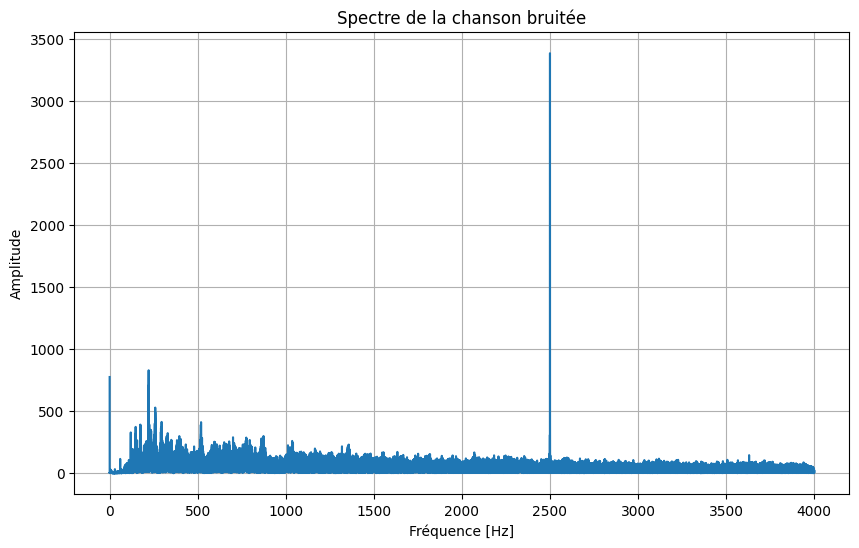

Lecture du son filtré...


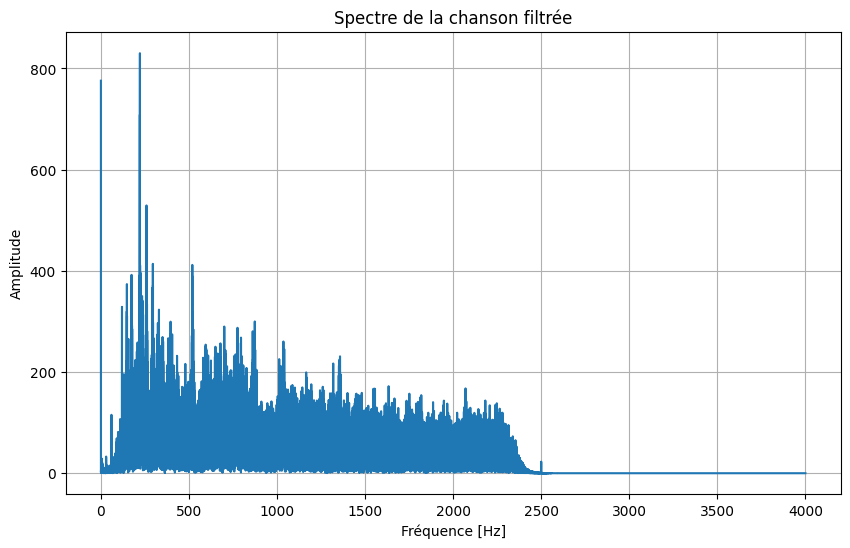

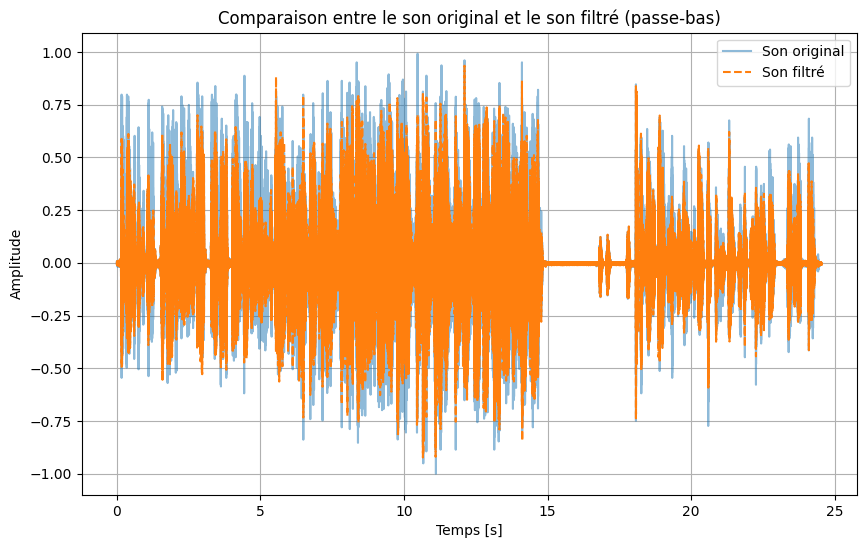

Le son filtré a été sauvegardé sous 'alien_bruit1_filtre_passe_bas.wav'


In [16]:
# Lecture du fichier son Original
fe, data2 = read('../Fichiers-pour-TP/sound/alien_bruit1.wav')
print(f"Fréquence d'échantillonnage: {fe} Hz")
print(f"Nombre d'échantillons: {len(data2)}")

# Normaliser le signal si besoin (pour les fichiers wav int16)
data2 = data2 / np.max(np.abs(data2))

# 2. Analyse spectrale pour identifier la fréquence du bruit
t_original1 = np.arange(len(data2)) / fe
TF_original1 = np.fft.fft(data2)
frequencies_original1 = np.fft.fftfreq(len(TF_original1), d=1/fe)

# Affichage du spectre pour visualiser le bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_original1[:len(frequencies_original1)//2], np.abs(TF_original1[:len(frequencies_original1)//2]))
plt.title('Spectre de la chanson bruitée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Identification de la fréquence du bruit (à adapter selon le pic observé dans le spectre)
# freq_bruit = 2500  # Par exemple, si le pic de bruit est à 1000 Hz

# 3. Conception du filtre passe-bas pour atténuer le bruit
# Choisir la fréquence de coupure pour atténuer le bruit détecté
fc = 2350  # Fréquence de coupure choisie en Hz (à ajuster en fonction du bruit)
wc = fc / (fe / 2)  # Normalisation par rapport à la fréquence de Nyquist (Fe/2)
b, a = signal.butter(20, wc, btype='low')    # Création du Filtre Passe-bas

# 4. Application du filtre Passe-bas au signal
data_filtre1 = signal.filtfilt(b, a, data2)

# Écouter le son filtré pour évaluer le résultat
print("Lecture du son filtré...")
sd.play(data_filtre1, fe)
sd.wait()

# Analyse Spectrale du son Filtré
t_filtre1 = np.arange(len(data2)) / fe
TF_filtre1 = np.fft.fft(data_filtre1)
frequencies_filtre1 = np.fft.fftfreq(len(TF_filtre1), d=1/fe)

# Affichage du spectre pour visualiser le l'atténuation du bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_filtre1[:len(frequencies_filtre1)//2], np.abs(TF_filtre1[:len(frequencies_filtre1)//2]))
plt.title('Spectre de la chanson filtrée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 5. Sauvegarder le son filtré
write('../Fichiers-pour-TP/Sons-creer-modifie/alien_bruit1_filtre_passe_bas.wav', fe, (data_filtre1 * 32767).astype(np.int16))

# Visualisation de la partie nettoyée comparée au son original
plt.figure(figsize=(10, 6))
plt.plot(t_original1, data2, label='Son original', alpha=0.5)
plt.plot(t_filtre1, data_filtre1, label='Son filtré', linestyle='--')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.title('Comparaison entre le son original et le son filtré (passe-bas)')
plt.legend()
plt.grid(True)
plt.show()

# Reconstitution du son entier en sauvegardant la version filtrée
print("Le son filtré a été sauvegardé sous 'alien_bruit1_filtre_passe_bas.wav'")

#### Son Filtré Passe-bande

Fréquence d'échantillonnage: 8000 Hz
Nombre d'échantillons: 196308


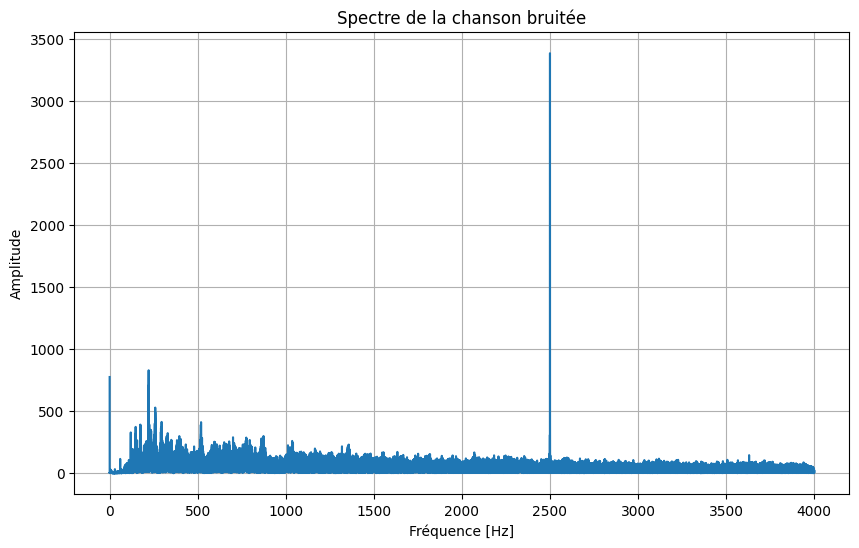

Lecture du son filtré (passe-bande)...


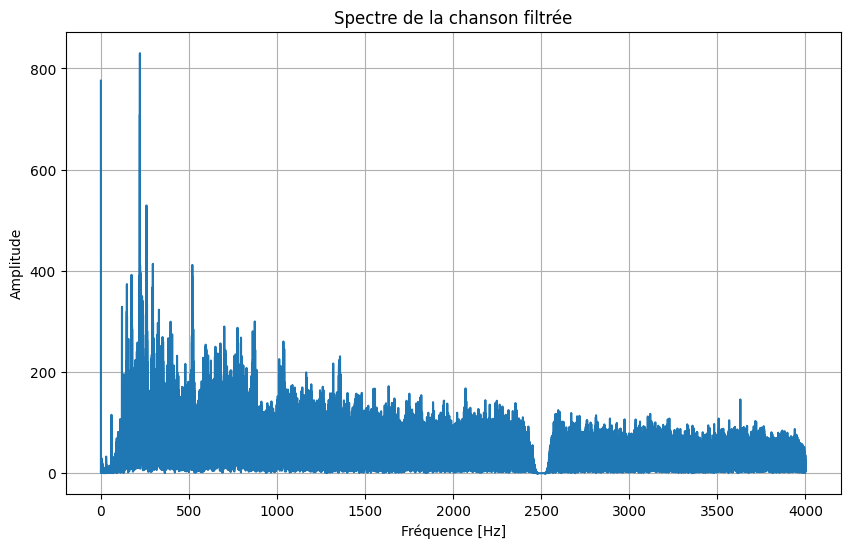

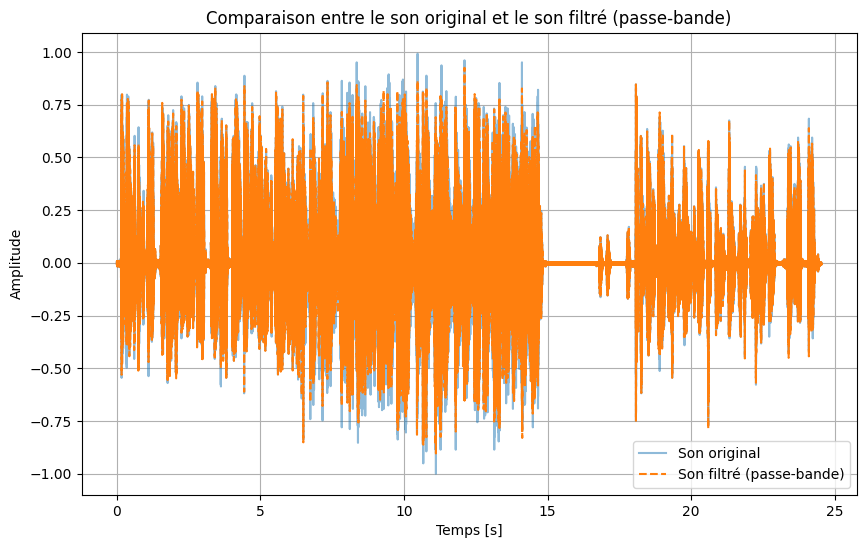

Le son filtré a été sauvegardé sous 'alien_bruit1_filtre_passe_bande.wav'


In [17]:
# Lecture du fichier son Original
fe, data3 = read('../Fichiers-pour-TP/sound/alien_bruit1.wav')
print(f"Fréquence d'échantillonnage: {fe} Hz")
print(f"Nombre d'échantillons: {len(data3)}")

# Normaliser le signal si besoin (pour les fichiers wav int16)
data3 = data3 / np.max(np.abs(data3))

# 2. Analyse spectrale pour identifier la fréquence du bruit
t_original2 = np.arange(len(data3)) / fe
TF_original2 = np.fft.fft(data3)
frequencies_original2 = np.fft.fftfreq(len(TF_original2), d=1/fe)

# Affichage du spectre pour visualiser le bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_original2[:len(frequencies_original2)//2], np.abs(TF_original2[:len(frequencies_original2)//2]))
plt.title('Spectre de la chanson bruitée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Création du filtre passe-bande de Butterworth (ordre 3 ou 4)
# fc1 et fc2 sont les fréquences de coupure
fc1 = 2450  # Borne inférieure de la bande (par exemple)
fc2 = 2550  # Borne supérieure de la bande (par exemple)
b, a = signal.butter(3, [fc1 / (fe / 2), fc2 / (fe / 2)], btype='bandstop')  # Création du filtre Passe-bande d'ordre 3

# Application du filtre sur le signal
data_filtre_bandstop = signal.filtfilt(b, a, data3)

# Écouter le signal filtré
print("Lecture du son filtré (passe-bande)...")
# sd.play(data_filtre_bandstop, fe)
# sd.wait()

# Analyse Spectrale du son Filtré
t_filtre2 = np.arange(len(data3)) / fe
TF_filtre2 = np.fft.fft(data_filtre_bandstop)
frequencies_filtre2 = np.fft.fftfreq(len(TF_filtre2), d=1/fe)

# Affichage du spectre pour visualiser l'atténuation du bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_filtre2[:len(frequencies_filtre2)//2], np.abs(TF_filtre2[:len(frequencies_filtre2)//2]))
plt.title('Spectre de la chanson filtrée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Sauvegarder le signal filtré
write('../Fichiers-pour-TP/Sons-creer-modifie/alien_bruit1_filtre_passe_bande.wav', fe, (data_filtre_bandstop * 32767).astype(np.int16))

# Afficher le signal original et filtré pour comparaison
plt.figure(figsize=(10, 6))
plt.plot(t_original2, data3, label='Son original', alpha=0.5)
plt.plot(t_filtre2, data_filtre_bandstop, label='Son filtré (passe-bande)', linestyle='--')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.title('Comparaison entre le son original et le son filtré (passe-bande)')
plt.legend()
plt.grid(True)
plt.show()

# Reconstitution du son entier en sauvegardant la version filtrée
print("Le son filtré a été sauvegardé sous 'alien_bruit1_filtre_passe_bande.wav'")

**Exercice 3.15** Reprenez le signal de l'exercice 2.7. Est-il possible de le filtrer pour supprimer le battement ? Même question pour le signal de l'exercice 2.8. 

Lecture du son Original...


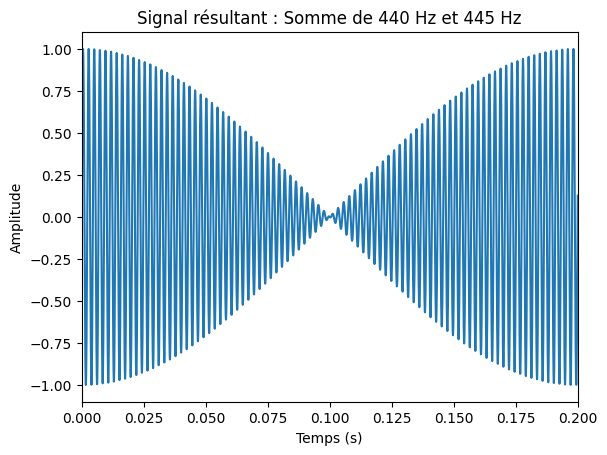

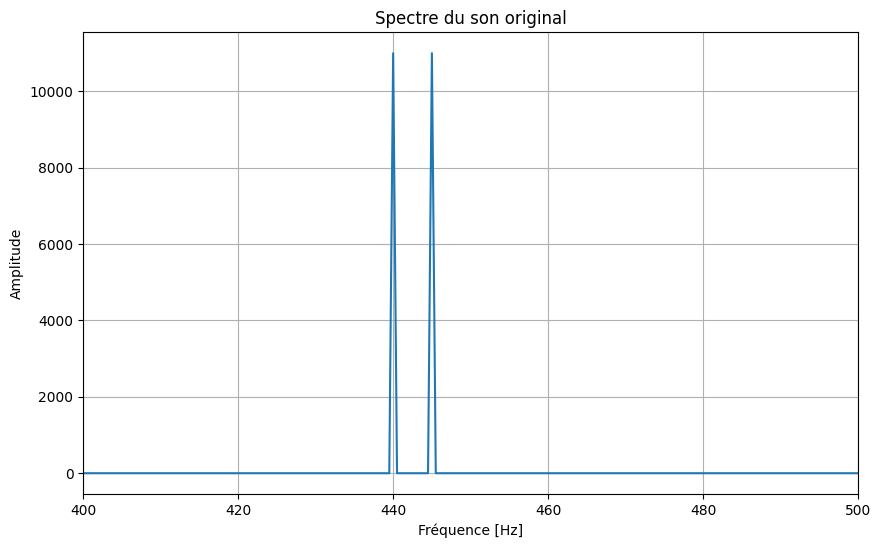

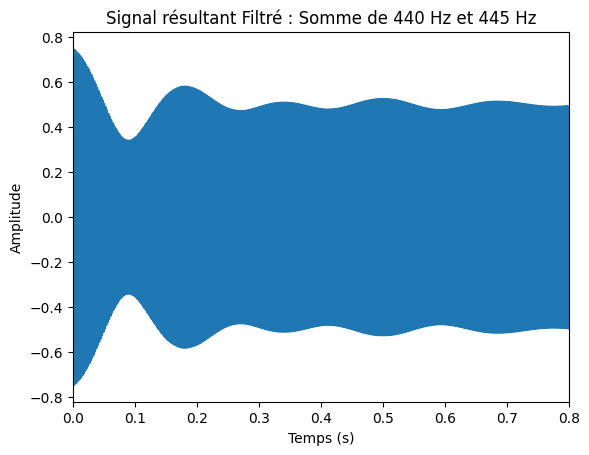

Lecture du son filtré (passe-bande)...


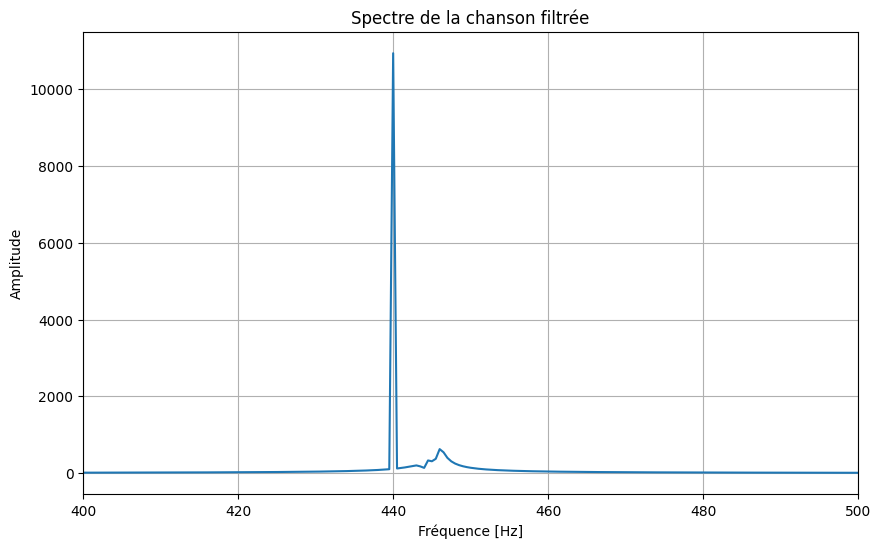

In [30]:
# Données pour créer le signal avec battement
f1 = 440  # Fréquence du premier signal (en Hz)
f2 = 445  # Fréquence du deuxième signal (en Hz)
A = 0.5   # Amplitude de chacun des signaux
duration = 2  # Durée du signal en secondes
fe = 22000  # Fréquence d'échantillonnage (en Hz)

# Calcul du pas/de l'écart entre 2 échantillons qui est égal à '1/fe' avec 'fe' qui est la fréquence d'échantillonage.
Te = 1 / fe

# Génération du temps 't' qui va de 0 à 4 par pas de 'Te'
t = np.arange(0, duration, Te)

# Création des deux signaux sinusoïdaux
signal1 = A * np.sin(2 * np.pi * f1 * t)
signal2 = A * np.sin(2 * np.pi * f2 * t)

# Signal résultant : somme des deux signaux
signal_sum = signal1 + signal2

# Lecture du signal
print(f"Lecture du son Original...")
sd.play(signal_sum, fe)
sd.wait()

# Visualisation du signal Original de la somme de Sinus
plt.plot(t, signal_sum)
plt.title("Signal résultant : Somme de 440 Hz et 445 Hz")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.xlim((0, 0.2))  # Limiter l'axe x pour mieux visualiser les oscillations
plt.show()

# Analyse Spectrale du signal de base
t_original3 = np.arange(len(signal_sum)) / fe
TF_original3 = np.fft.fft(signal_sum)
frequencies_original3 = np.fft.fftfreq(len(TF_original3), d=1/fe)

# Affichage du Spectre du signal
plt.figure(figsize=(10, 6))
plt.plot(frequencies_original3[:len(frequencies_original3)//2], np.abs(TF_original3[:len(frequencies_original3)//2]))
plt.title('Spectre du son original')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim((400, 500))
plt.show()

#---------------------------------------------------------------------------------

# Création du filtre passe-bande de Butterworth (ordre 3 ou 4)
# fc1 et fc2 sont les fréquences de coupure
fc1 = 444  # Borne inférieure de la bande (par exemple)
fc2 = 446  # Borne supérieure de la bande (par exemple)
b, a = signal.butter(3, [fc1 / (fe / 2), fc2 / (fe / 2)], btype='bandstop')  # Création du filtre Passe-bande d'ordre 3

# Application du filtre sur le signal
data_filtre_bandstop2 = signal.filtfilt(b, a, signal_sum)

# Visualisation Temporel du son Filtré
plt.plot(t, data_filtre_bandstop2)
plt.title("Signal résultant Filtré : Somme de 440 Hz et 445 Hz")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.xlim((0, 0.8))  # Limiter l'axe x pour mieux visualiser les oscillations
plt.show()

# Écouter le signal filtré
print("Lecture du son filtré (passe-bande)...")
sd.play(data_filtre_bandstop2, fe)
sd.wait()


# Analyse Spectrale du son Filtré
t_filtre3 = np.arange(len(data3)) / fe
TF_filtre3 = np.fft.fft(data_filtre_bandstop2)
frequencies_filtre3 = np.fft.fftfreq(len(TF_filtre3), d=1/fe)

# Affichage du spectre pour visualiser l'atténuation du bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_filtre3[:len(frequencies_filtre3)//2], np.abs(TF_filtre3[:len(frequencies_filtre3)//2]))
plt.title('Spectre de la chanson filtrée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim((400, 500))
plt.show()

*Dans l'ex ci-dessus :*

- Lorsqu'on a une **somme** de Sinus nous avons un **battement** qui se fait entendre. Ce battement c'est comme lorsqu'on essaie d'accorder la corde d'une guitare avec une autre corde de référence qui sonne à la bonne fréquence, on a alors une sensation bizarre à l'oreille lorsque la corde qu'on accorde atteint presque la même fréquence que celle de référence.

- Il s'agit un peu d'une **Modulation d'Amplitude** `(AM)` où l'on a en fait un **signal porteur** à (fréquence la plus élevée des 2 donc 445Hz moins le signal information qui est 2.5HZ) `442.5Hz` et un **signal qui est l'information** sous forme d'un sinus à (0.4 sec pour 1 période donc 2.5 période par sec --> 2.5Hz) `2.5Hz`. 

*N.B.: Les calculs des différentes fréquences qu'on à après cette somme de Sinus est régie par la **formule de Somme des Sinus** :*

**sin(a) + sin(b) = 2cos ($\frac{a-b}{2}$) . sin($\frac{a+b}{2}$)**

- Globalement on vient filtrer le signal créer pour éliminer 1 des 2 fréquences afin d'éliminer ce battement (ou plutôt **l'atténuer**).

**Exercice 3.16** Créez une suite de notes allant du La de la troisième octave au La de la neuvième octave. Vous aurez sept notes. Choisissez la fréquence d'échantillonnage $F_e = 8000$ Hz.

- Écoutez le résultat et visualisez le spectre du nouveau signal.
- Identifiez les fréquences que vous allez réellement entendre.
- Vérifiez si votre prédiction est correcte.
- Filtrez le signal pour éviter la présence de fréquences fantômes.

Fréquences des notes: [440, 880, 1760, 3520, 7040, 14080, 28160]
Lecture de la suite de notes...


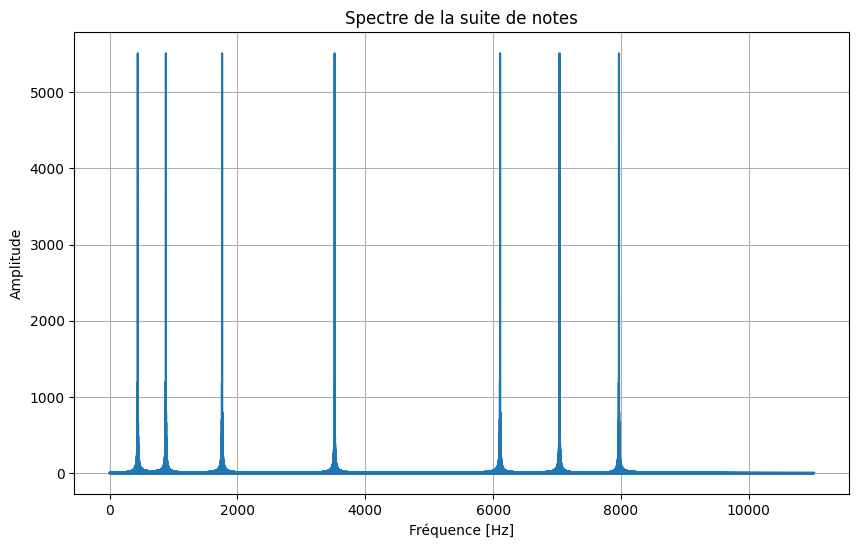

Fréquences audibles: [440, 880, 1760, 3520, 7040]
Lecture du signal filtré...


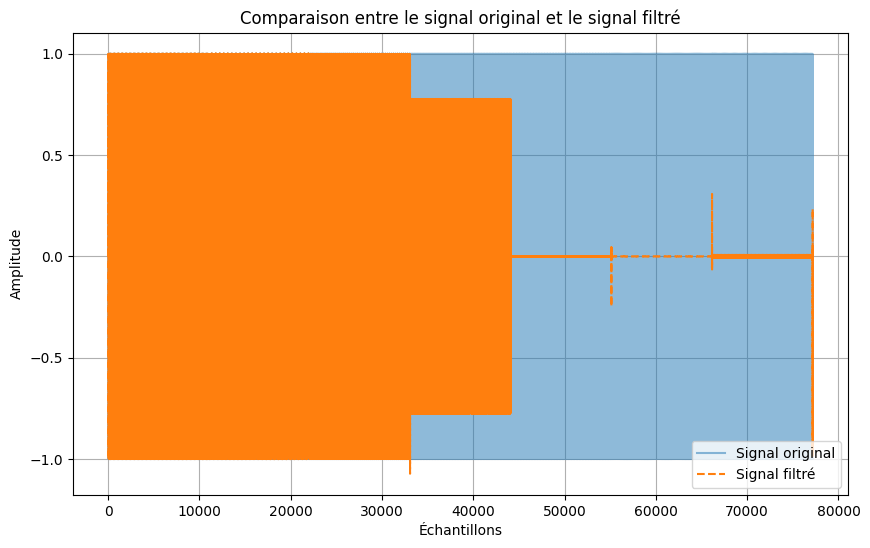

In [27]:
# Fréquence d'échantillonnage et durée de chaque note
Fe = 22050  # Fréquence d'échantillonnage
duree = 0.5  # Durée de chaque note en secondes

# Fréquence de la note La de la troisième octave
frequence_base = 440  # Hz

# Calcul des fréquences pour chaque octave de la troisième à la neuvième
frequences = [frequence_base * (2 ** n) for n in range(7)]
print("Fréquences des notes:", frequences)

# Création du signal pour chaque note
t = np.arange(0, duree, 1/Fe)
signal_concatenated = np.concatenate([np.sin(2 * np.pi * f * t) for f in frequences])

# Écouter le signal
print("Lecture de la suite de notes...")
sd.play(signal_concatenated, Fe)
sd.wait()

# Afficher le spectre
TF = np.fft.fft(signal_concatenated)
frequencies = np.fft.fftfreq(len(TF), 1/Fe)

# Affichage du spectre (seulement la moitié des fréquences)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(TF[:len(TF)//2]))
plt.title("Spectre de la suite de notes")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------------------------------------

# Identifiez les fréquences audibles (entre 20 Hz et Fe/2)
frequences_audibles = [f for f in frequences if 20 <= f <= Fe/2]
print("Fréquences audibles:", frequences_audibles)

# Filtrage pour éviter les fréquences fantômes
# Création d'un filtre passe-bas pour éviter les fréquences supérieures à Fe/2
fc = 4000  # Fréquence de coupure à Fe/2
b, a = signal.butter(4, fc / (Fe / 2), btype='low')

# Filtrage du signal
signal_filtre = signal.filtfilt(b, a, signal_concatenated)

# Écoute du signal filtré
print("Lecture du signal filtré...")
sd.play(signal_filtre, Fe)
sd.wait()

# Affichage du signal filtré pour comparaison
plt.figure(figsize=(10, 6))
plt.plot(signal_concatenated, label='Signal original', alpha=0.5)
plt.plot(signal_filtre, label='Signal filtré', linestyle='--')
plt.title("Comparaison entre le signal original et le signal filtré")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

*Dans l'ex ci-dessus :*

- Globalement on créer les différents fréquences qu'on enregistre dans un Array. Ensuite on créer les différents signaux et on les concatène en un seul signal.

- On affiche le Spectre Frequentiel du signal. Et on peut remarquer qu'il y a des Pics Frequentiels Fantômes qui oscilles aux alentours de certaines fréquences comme 800Hz. Ces fréquences apparaissent lorsqu'on essaie d'échantilloner une fréquence qui est + grande que Fe/2. Lorsque c'est le cas il y a alors Repliement de Spectre (ou aliasing). Par exemple, la fréquence de 7040Hz est plus grande que Fe/2 (donc 8000/2 = 4000Hz) il va donc y avoir repliement de la fréquence à 8000 - 7040 = 960Hz.

- Si on augmente la fréquence d'échantillonage à 44100Hz on évite ce genre de repliement dans le Spectre audible par l'humain.

**Exercice 3.17** Filtrez le signal `tarzan.wav` au moyen d'un filtre de Butterworth passe-bas, d'ordre 2 et de fréquence de coupure $F_c=1000$ Hz en utilisant les fonctions `signal.butter` et `signal.filtfilt`. Utilisez ensuite les fonctions `fft.fftfreq` et `fft.fft` pour visualiser le spectre avant et après filtrage, comme cela a été fait à la section 3.2.1.

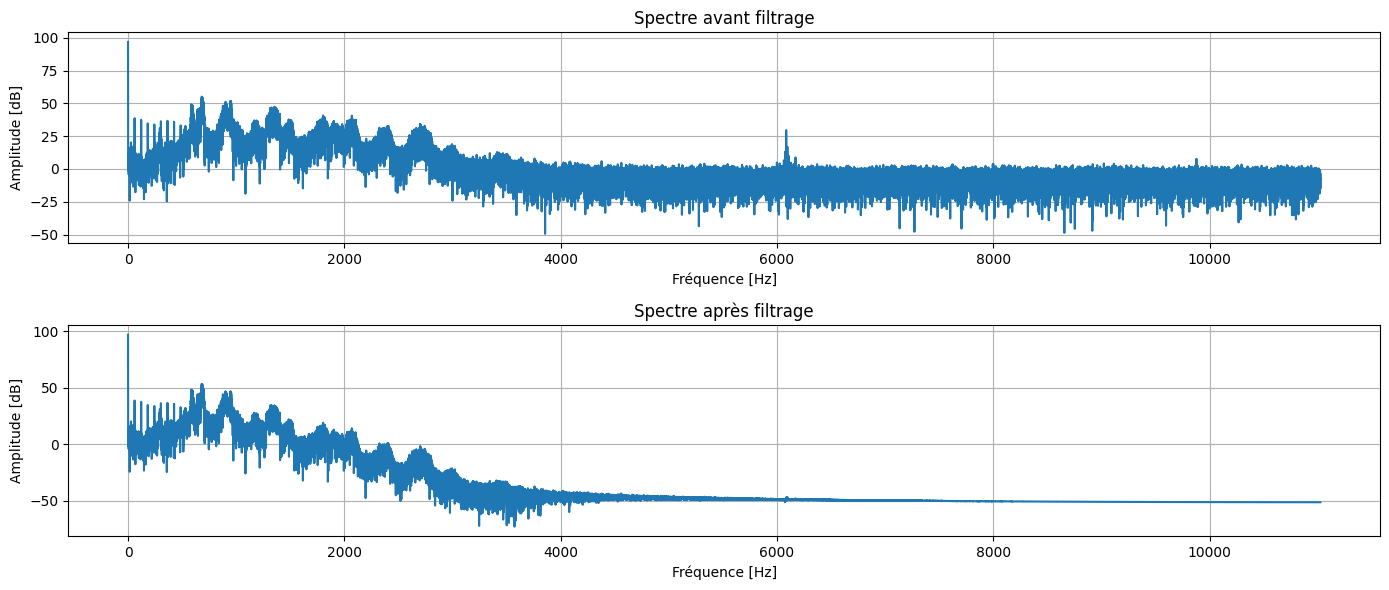

Lecture du signal avant filtrage...
Lecture du signal après filtrage...


In [39]:
# 1. Chargement du signal
Fe, signal_audio = read('../Fichiers-pour-TP/tarzan.wav')  # signal_audio : signal audio, Fe : fréquence d'échantillonnage

# Vérifier les dimensions du signal (mono ou stéréo)
if len(signal_audio.shape) > 1:
    # Prendre seulement un canal si le signal est stéréo
    signal_audio = signal_audio[:, 0]

# Normaliser le signal si besoin (pour les fichiers wav int16)
signal_audio = signal_audio / np.max(np.abs(signal_audio))

# 2. Création du filtre Butterworth passe-bas
Fc = 1000  # Fréquence de coupure en Hz
ordre = 2  # Ordre du filtre
Wn = Fc / (Fe / 2)  # Fréquence de coupure normalisée entre 0 et 1
b, a = signal.butter(ordre, Wn, btype='low')

# 3. Application du filtre
signal_filtre = signal.filtfilt(b, a, signal_audio)

# 4. Visualisation des spectres avant et après filtrage

# Calcul de la transformée de Fourier pour les deux signaux
TF_original4 = np.fft.fft(signal_audio)
TF_filtre4 = np.fft.fft(signal_filtre)
frequencies4 = np.fft.fftfreq(len(TF_original4), 1/Fe)

# Affichage des spectres
plt.figure(figsize=(14, 6))

# Spectre avant filtrage
plt.subplot(2, 1, 1)
plt.plot(frequencies4[:len(frequencies4)//2], 20 * np.log10(np.abs(TF_original4[:len(TF_original4)//2])))
plt.title("Spectre avant filtrage")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude [dB]")
plt.grid(True)

# Spectre après filtrage
plt.subplot(2, 1, 2)
plt.plot(frequencies4[:len(frequencies4)//2], 20 * np.log10(np.abs(TF_filtre4[:len(TF_filtre4)//2])))
plt.title("Spectre après filtrage")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude [dB]")
plt.grid(True)

plt.tight_layout()
plt.show()

# Écouter le signal avant et après filtrage
print("Lecture du signal avant filtrage...")
sd.play(signal_audio, Fe)
sd.wait()

print("Lecture du signal après filtrage...")
sd.play(signal_filtre, Fe)
sd.wait()

*Dans l'ex ci-dessus :*

- Il n'y a rien de nouveau par rapport aux exercices précédents.

**Exercice 3.18** Importez le signal `tarzan.wav`.

- Utilisez les fonctions `signal.spectrogram` et `plt.pcolormesh` pour visualiser l'évolution de son spectre au cours du temps.
- Créez un signal qui est la somme d'un sinus de 440 Hz et d'un sinus de 800 Hz et qui a le même nombre d'échantillons que le signal sonore. C'est un bruit parasite.
- Créez un signal qui est la superposition du signal d'origine et du bruit parasite. Nous l'appelons « signal bruité ».
- Visualisez l'évolution de son spectre au cours du temps au moyen d'un spectrogramme.
- Réalisez un filtre qui atténue le bruit uniquement sur la partie bruitée. Sauvez ce résultat dans un nouveau fichier `.wav`.

##### Utilisation des fonctions `signal.spectrogram` et `plt.pcolormesh` sur le fichier audio `tarzan.wav`:

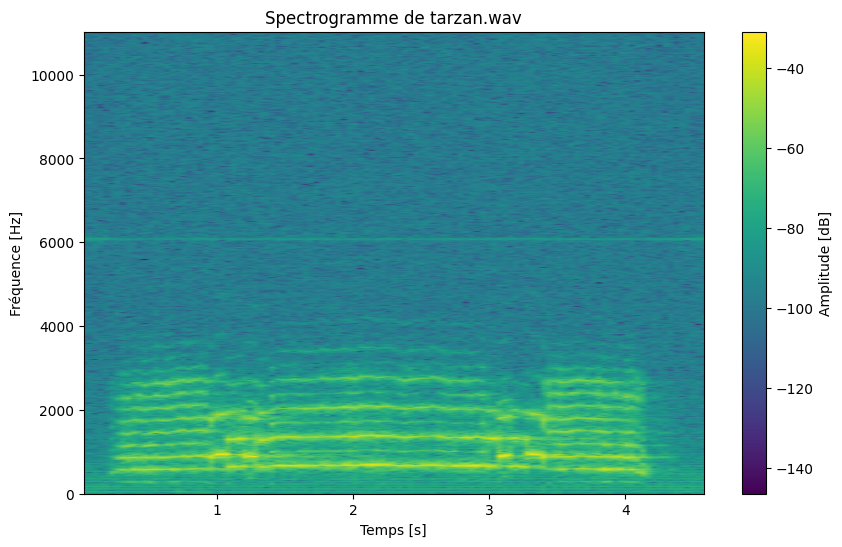

In [40]:
# 1. Chargement du signal
Fe, signal_audio = read('../Fichiers-pour-TP/tarzan.wav')

# Normaliser le signal si besoin (pour les fichiers wav int16)
signal_audio = signal_audio / np.max(np.abs(signal_audio))

# 2. Calcul du spectrogramme
# nperseg : longueur de chaque segment (par exemple 1024 ou 2048 pour une meilleure résolution)
frequencies5, times, Sxx = signal.spectrogram(signal_audio, Fe, nperseg=1024)

# 3. Visualisation du spectrogramme
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies5, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Amplitude [dB]')
plt.title('Spectrogramme de tarzan.wav')
plt.xlabel('Temps [s]')
plt.ylabel('Fréquence [Hz]')
plt.ylim(0, Fe / 2)  # Afficher jusqu'à Fe/2 (maximum audible)
plt.show()

##### Création et ajout de la somme de sinus qui est un bruit parasite + visualisation sur un Spectrogramme :

bruit parasite :  [0.         0.35104263 0.68842884 ... 0.91162122 1.01503449 1.06726296]
Le fichier bruité a été enregistré sous le nom 'tarzan_bruit_parasite.wav'.


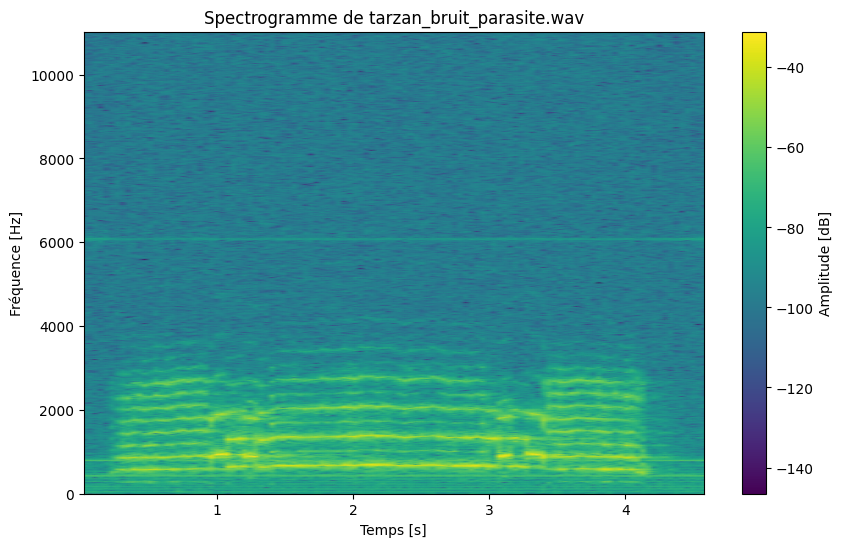

In [55]:
# 1. Chargement du fichier audio 'tarzan.wav'
Fe4, signal_audio = read('../Fichiers-pour-TP/tarzan.wav')

# 2. Création des sinusoïdes
# Durée totale du signal en secondes
duree = len(signal_audio) / Fe4

# Création de l'axe des temps pour la durée totale avec le même nombre d'échantillons
t = np.linspace(0, duree, len(signal_audio), endpoint=False)

# Sinusoïde à 440 Hz
sinus_440Hz = np.sin(2 * np.pi * 440 * t)
# Sinusoïde à 800 Hz
sinus_800Hz = np.sin(2 * np.pi * 800 * t)
# Addition des sinusoïdes pour créer le bruit parasite
bruit_parasite = sinus_440Hz + sinus_800Hz

# 3. Ajout du bruit parasite au signal original
signal_bruite = signal_audio + bruit_parasite

# 4. Normalisation pour éviter les saturations (si nécessaire)
# On ramène les valeurs entre -1 et 1 pour un fichier audio
signal_bruite = signal_bruite / np.max(np.abs(signal_bruite))

# 5. Enregistrement du nouveau signal bruité dans un fichier audio
write('../Fichiers-pour-TP/Sons-creer-modifie/tarzan_bruit_parasite.wav', Fe4, (signal_bruite * 32767).astype(np.int16))

print(f"Le fichier bruité a été enregistré sous le nom 'tarzan_bruit_parasite.wav'.")

# ---------------------------------------------------------------------------------------------------
# Visualisation du nouveau son sur un Spectrogramme
# nperseg : longueur de chaque segment (par exemple 1024 ou 2048 pour une meilleure résolution)
frequencies, times, Sxx = signal.spectrogram(signal_bruite, Fe4, nperseg=1024)

# 3. Visualisation du spectrogramme
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Amplitude [dB]')
plt.title('Spectrogramme de tarzan_bruit_parasite.wav')
plt.xlabel('Temps [s]')
plt.ylabel('Fréquence [Hz]')
plt.ylim(0, Fe / 2)  # Afficher jusqu'à Fe/2 (maximum audible)
plt.show()


##### Filtrage du signal bruité (Filtre Passe-bande) *(+ affichage Spectrale)* :

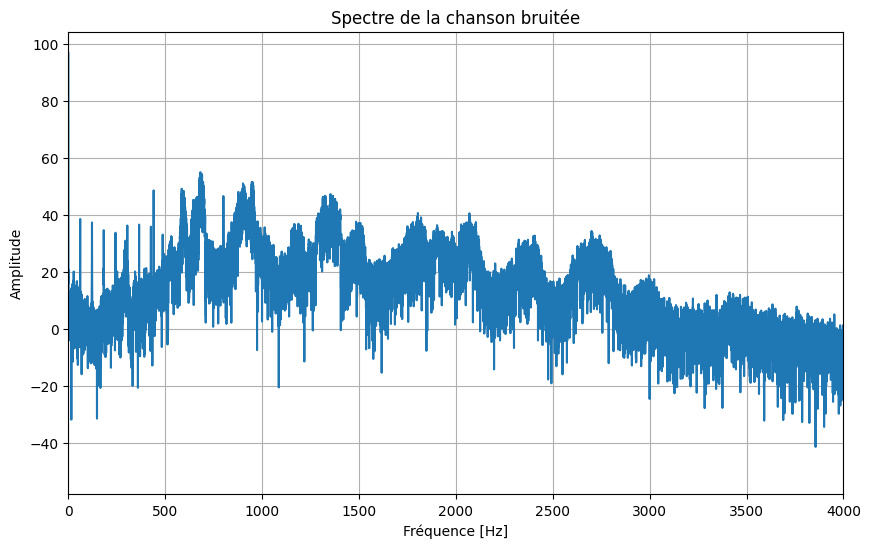

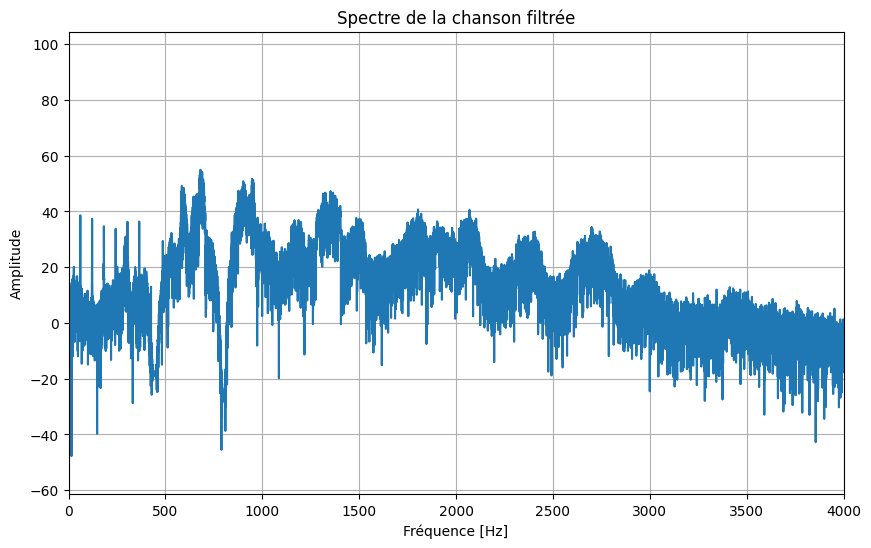

Le fichier filtré a été enregistré sous le nom 'tarzan_filtre.wav'.


In [67]:
# 1. Chargement du fichier audio 'tarzan.wav'
Fe5, signal_bruite_tarzan = read('../Fichiers-pour-TP/Sons-creer-modifie/tarzan_bruit_parasite.wav')

# Normaliser le signal si besoin (pour les fichiers wav int16)
signal_bruite_tarzan = signal_bruite_tarzan / np.max(np.abs(signal_bruite_tarzan))


# 2. Analyse spectrale pour identifier la fréquence du bruit
TF_original5 = np.fft.fft(signal_bruite_tarzan)
frequencies_original5 = np.fft.fftfreq(len(TF_original5), 1/Fe5)

# Affichage du spectre pour visualiser le bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_original5[:len(frequencies_original5)//2], 20*np.log10(np.abs(TF_original5[:len(frequencies_original5)//2])))
plt.title('Spectre de la chanson bruitée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.xlim((0,4000))
plt.ylim()
plt.grid(True)
plt.show()

# Création du filtre passe-bande de Butterworth (ordre 3 ou 4)
# fc1 et fc2 sont les fréquences de coupure
fc1 = 410  # Borne inférieure de la bande (par exemple)
fc2 = 480  # Borne supérieure de la bande (par exemple)
fc3 = 760
fc4 = 840
b1, a1 = signal.butter(2, [fc1 / (Fe5 / 2), fc2 / (Fe5 / 2)], btype='bandstop')  # Création du filtre Passe-bande d'ordre 2
b2, a2 = signal.butter(2, [fc3 / (Fe5 / 2), fc4 / (Fe5 / 2)], btype='bandstop')

# Application du filtre sur le signal
signal_filtre_bandstop1 = signal.filtfilt(b1, a1, signal_bruite_tarzan)
signal_filtre_bandstop2 = signal.filtfilt(b2, a2, signal_filtre_bandstop1)

TF_original6 = np.fft.fft(signal_filtre_bandstop2)
frequencies_original6 = np.fft.fftfreq(len(TF_original6), 1/Fe5)

# Affichage du spectre pour visualiser le bruit
plt.figure(figsize=(10, 6))
plt.plot(frequencies_original6[:len(frequencies_original6)//2], 20*np.log10(np.abs(TF_original6[:len(frequencies_original6)//2])))
plt.title('Spectre de la chanson filtrée')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.xlim((0,4000))
plt.ylim()
plt.grid(True)
plt.show()

# 5. Enregistrement du nouveau signal bruité dans un fichier audio
write('../Fichiers-pour-TP/Sons-creer-modifie/tarzan_filtre.wav', Fe5, (signal_filtre_bandstop2 * 32767).astype(np.int16))

print(f"Le fichier filtré a été enregistré sous le nom 'tarzan_filtre.wav'.")


*Dans l'ex ci-dessus :*

- On joue avec un petit peu tout ce qu'on a vu auparavant.

- Ici lorsque je décide de filtrer la fréquence parasite il ne faut pas oublier que c'est l'addition d'un *Sinus* de `440Hz` avec une *Sinus* de `800Hz` ! Dons je dois filtrer la fréquence qui en résulte et non les 2 fréquences originaire de ce bruit.